In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('credit_card_fraud_10k.csv')
df.head()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


In [3]:
df.isnull().sum()

transaction_id         0
amount                 0
transaction_hour       0
merchant_category      0
foreign_transaction    0
location_mismatch      0
device_trust_score     0
velocity_last_24h      0
cardholder_age         0
is_fraud               0
dtype: int64

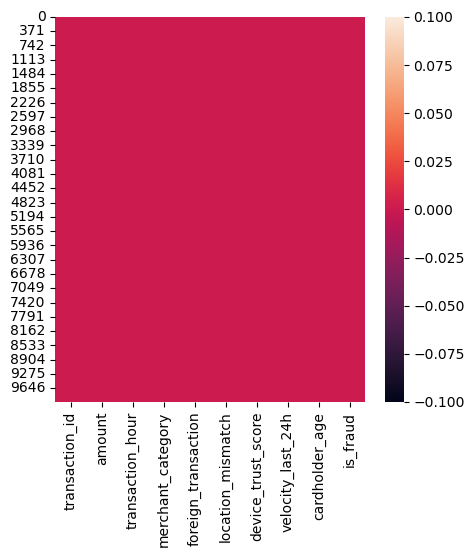

In [4]:
plt.figure(figsize=(5,5))
sns.heatmap(df.isnull())
plt.show()

In [5]:
df.duplicated().sum()

0

In [6]:
df.shape

(10000, 10)

In [7]:
df.dtypes

transaction_id           int64
amount                 float64
transaction_hour         int64
merchant_category       object
foreign_transaction      int64
location_mismatch        int64
device_trust_score       int64
velocity_last_24h        int64
cardholder_age           int64
is_fraud                 int64
dtype: object

In [8]:
df['amount'] = df['amount'].astype(int)

In [9]:
df.dtypes

transaction_id          int64
amount                  int32
transaction_hour        int64
merchant_category      object
foreign_transaction     int64
location_mismatch       int64
device_trust_score      int64
velocity_last_24h       int64
cardholder_age          int64
is_fraud                int64
dtype: object

In [12]:
from sklearn.preprocessing import LabelEncoder  # always find label encoding before finding  x and y

In [13]:
lr = LabelEncoder()

In [14]:
df['merchant_category']= lr.fit_transform(df['merchant_category'])  
df['merchant_category']

0       1
1       4
2       3
3       3
4       2
       ..
9995    2
9996    0
9997    1
9998    1
9999    0
Name: merchant_category, Length: 10000, dtype: int32

In [15]:
df['is_fraud'].value_counts() 

is_fraud
0    9849
1     151
Name: count, dtype: int64

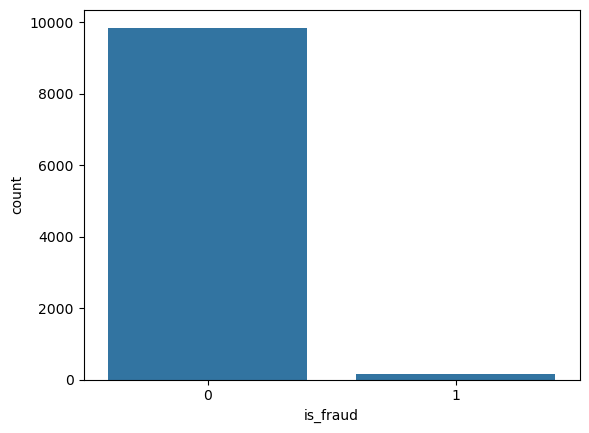

In [16]:
sns.countplot(data = df, x ='is_fraud' )
plt.show()

In [17]:
x= df.drop(columns=['is_fraud'])

In [18]:
y = df['is_fraud']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=1)

In [21]:
df.dtypes

transaction_id         int64
amount                 int32
transaction_hour       int64
merchant_category      int32
foreign_transaction    int64
location_mismatch      int64
device_trust_score     int64
velocity_last_24h      int64
cardholder_age         int64
is_fraud               int64
dtype: object

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [24]:
x_train_scaler= scaler.fit_transform(x_train)

In [25]:
x_test_scaler = scaler.transform(x_test)

In [26]:
# !pip install imblearn

In [27]:
from imblearn.over_sampling import RandomOverSampler

In [28]:
#before apply randomoversampler
y_train.value_counts() #check if not balance 

is_fraud
0    7882
1     118
Name: count, dtype: int64

In [29]:
#Apply RandomOverSampler 
#First create the object of class RandomOverSampler
ros=RandomOverSampler()

In [30]:
x_train1,y_train1=ros.fit_resample(x_train_scaler,y_train)
#here make a duplicate record from existing record of minority class

In [31]:
x_train1.shape

(15764, 9)

In [32]:
x_train.shape

(8000, 9)

In [33]:
y_train1.value_counts()

is_fraud
0    7882
1    7882
Name: count, dtype: int64

In [34]:
#Before apply randomoversample , check testing data
y_test.value_counts()

is_fraud
0    1967
1      33
Name: count, dtype: int64

In [35]:
x_test1,y_test1=ros.fit_resample(x_test_scaler,y_test)

In [36]:
#After apply randomoversample , check testing data
y_test1.value_counts()

is_fraud
0    1967
1    1967
Name: count, dtype: int64

In [37]:
#fit_resample() inbuilt method of RandomOversample class

In [38]:
def create_model(model):
    model.fit(x_train1,y_train1)
    y_pred = model.predict(x_test1)
    print("Classification Report:\n", classification_report(y_test1,y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_test1,y_pred))
    return model

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
logistic = LogisticRegression()

In [42]:
logistic = create_model(logistic)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      1967
           1       0.96      0.97      0.97      1967

    accuracy                           0.97      3934
   macro avg       0.97      0.97      0.97      3934
weighted avg       0.97      0.97      0.97      3934

Confusion matrix:
 [[1886   81]
 [  52 1915]]


In [43]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
knc = KNeighborsClassifier(n_neighbors= 5, metric='minkowski',p=2)
knc= create_model(knc)

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.99      0.84      1967
           1       0.98      0.64      0.77      1967

    accuracy                           0.81      3934
   macro avg       0.85      0.81      0.80      3934
weighted avg       0.85      0.81      0.80      3934

Confusion matrix:
 [[1940   27]
 [ 717 1250]]


In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt =  DecisionTreeClassifier(random_state = 1)  # criterion = gini by default

In [47]:
dt = create_model(dt)

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95      1967
           1       1.00      0.90      0.95      1967

    accuracy                           0.95      3934
   macro avg       0.95      0.95      0.95      3934
weighted avg       0.95      0.95      0.95      3934

Confusion matrix:
 [[1964    3]
 [ 196 1771]]


In [48]:
dt.feature_importances_

array([0.00379143, 0.03278515, 0.42361525, 0.00312647, 0.10860952,
       0.16946015, 0.1100123 , 0.14812681, 0.00047293])

In [49]:
dic = {
    "I/P columns" : x.columns,
    "Information gain" : dt.feature_importances_
}
dic
df1 = pd.DataFrame(dic)
df1

,I/P columns,Information gain
0,transaction_id,0.003791
1,amount,0.032785
2,transaction_hour,0.423615
3,merchant_category,0.003126
4,foreign_transaction,0.108610
5,location_mismatch,0.169460
6,device_trust_score,0.110012
7,velocity_last_24h,0.148127
8,cardholder_age,0.000473


In [50]:
df1.sort_values('Information gain', ascending = False)

,I/P columns,Information gain
2,transaction_hour,0.423615
5,location_mismatch,0.169460
7,velocity_last_24h,0.148127
6,device_trust_score,0.110012
4,foreign_transaction,0.108610
1,amount,0.032785
0,transaction_id,0.003791
3,merchant_category,0.003126
8,cardholder_age,0.000473


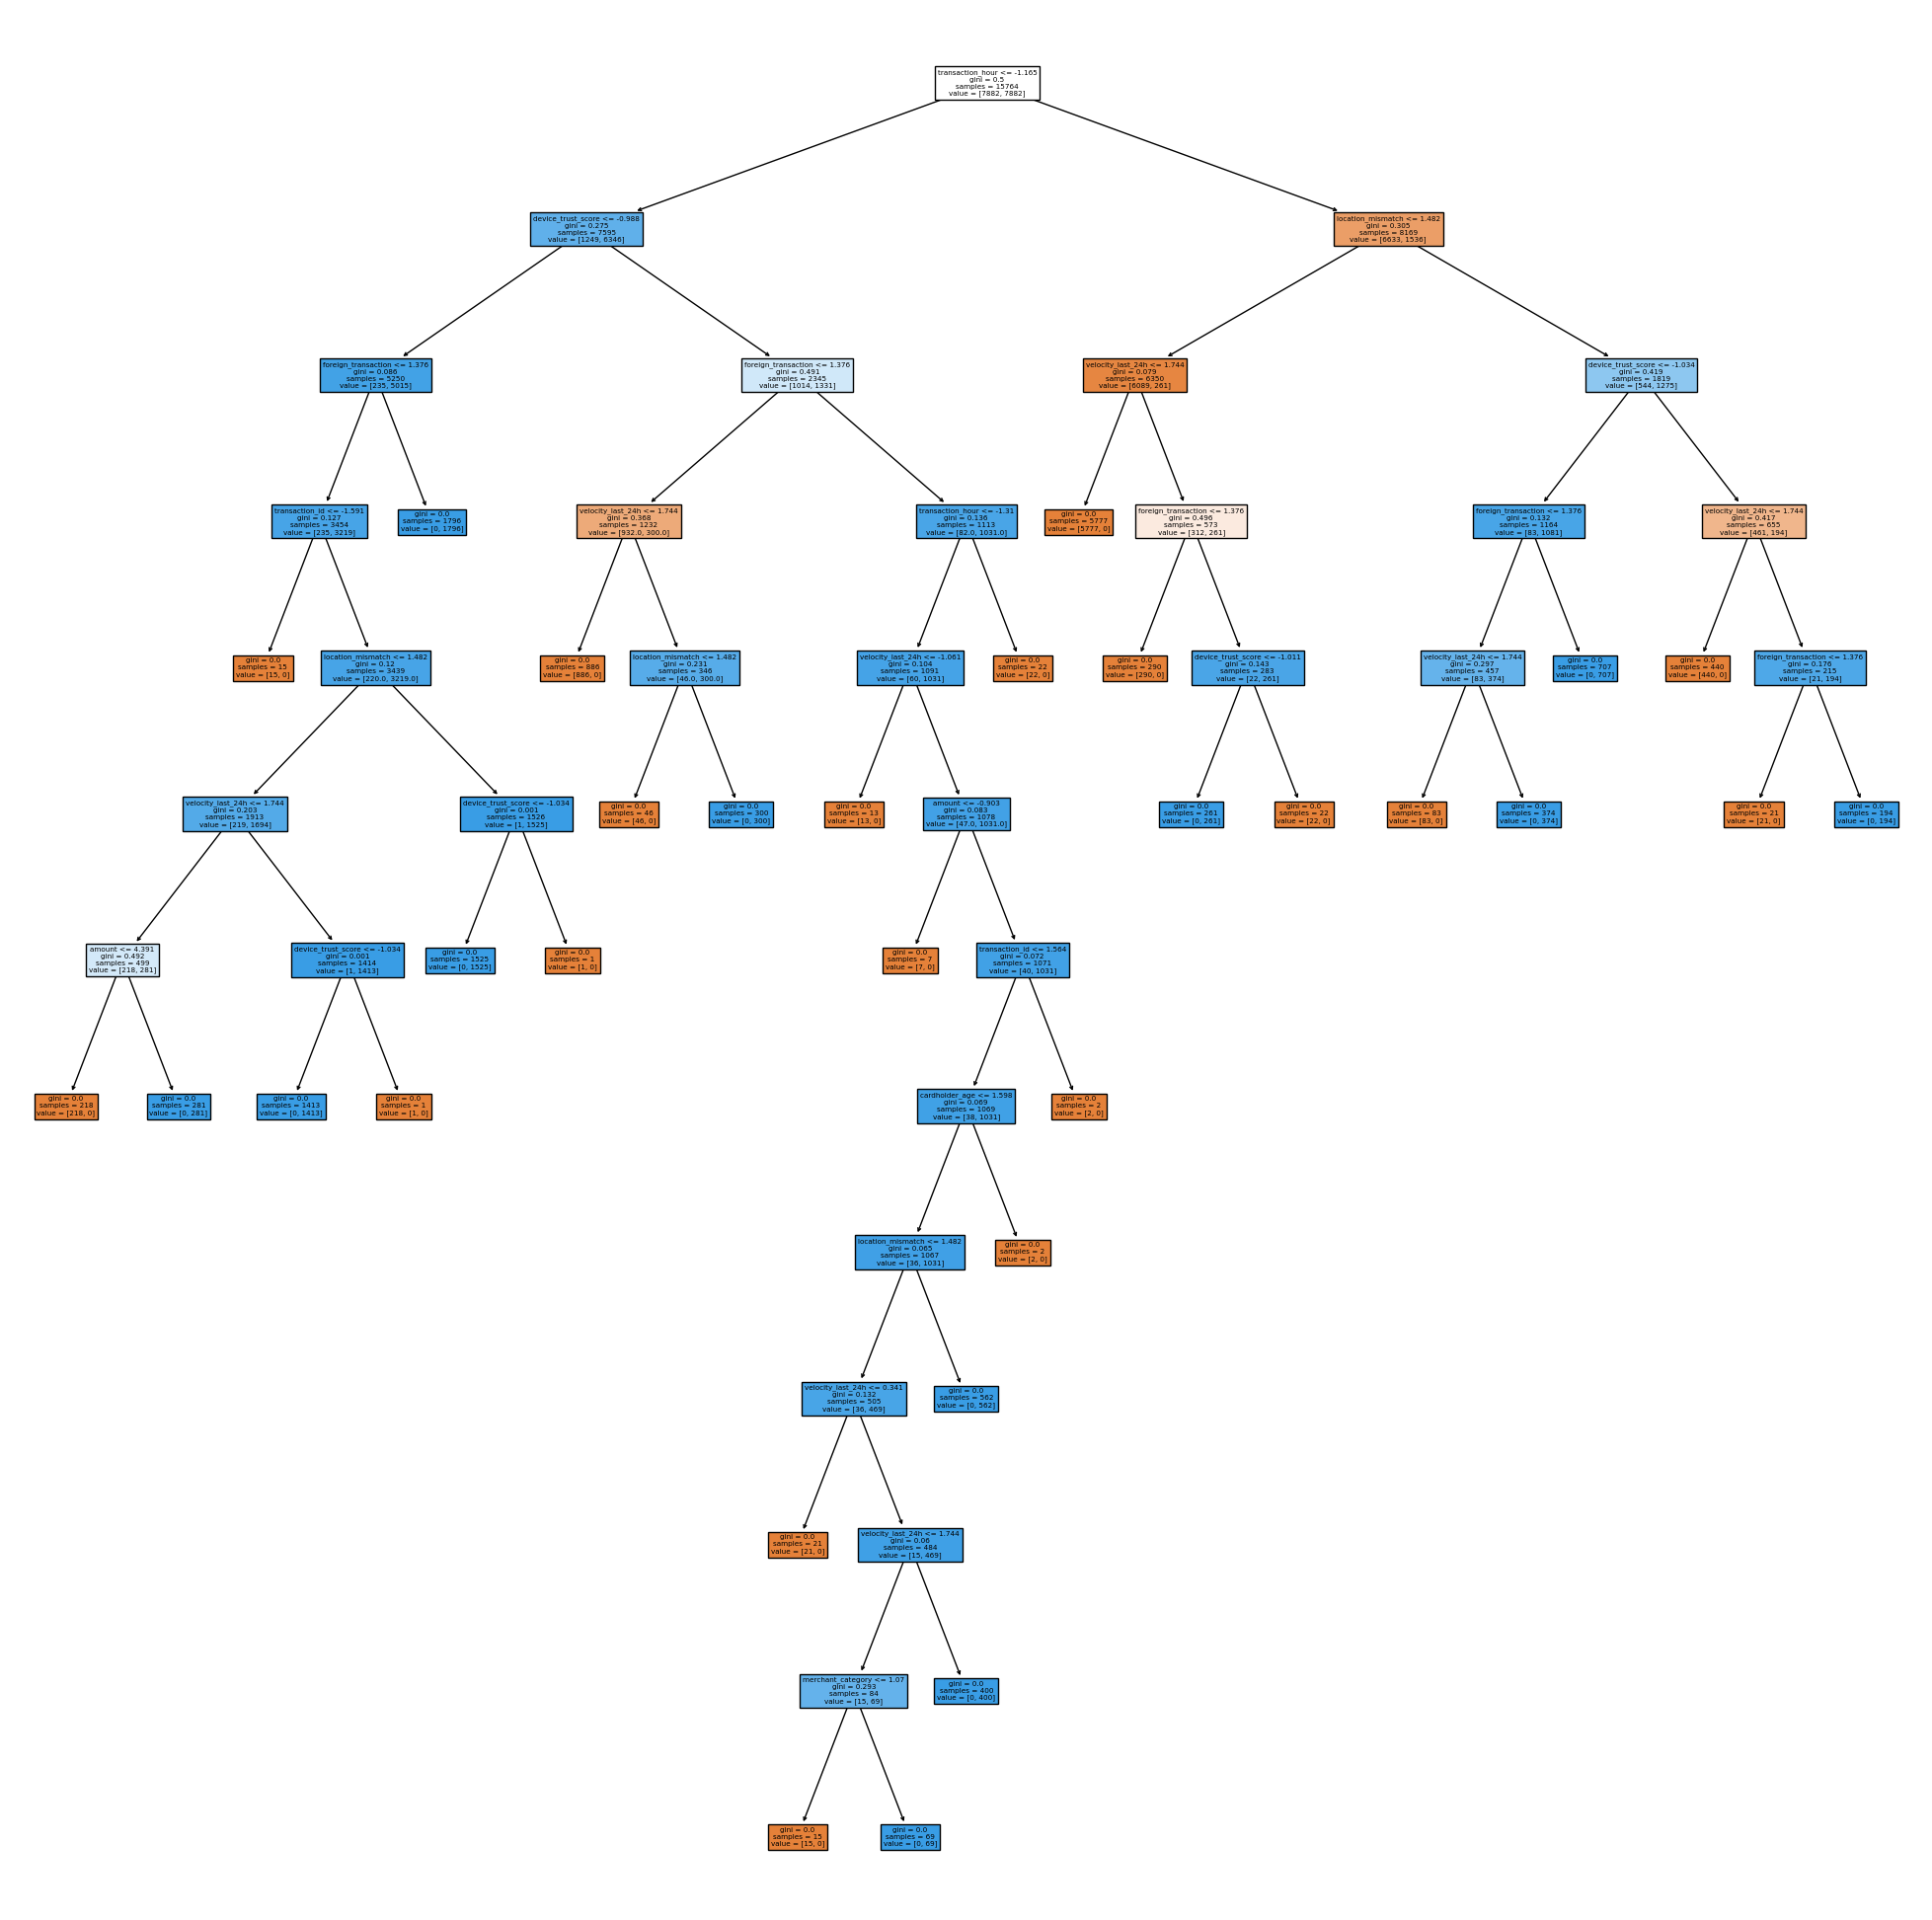

In [51]:
# How to visualize a tree
plt.figure(figsize=(25,25))
from sklearn import tree
features =x.columns
_= tree.plot_tree(dt, feature_names= features,filled = True)
plt.show()

In [52]:
dt1 = DecisionTreeClassifier(criterion='entropy', random_state =1)

In [53]:
dt1 = create_model(dt1)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1967
           1       1.00      0.97      0.98      1967

    accuracy                           0.98      3934
   macro avg       0.98      0.98      0.98      3934
weighted avg       0.98      0.98      0.98      3934

Confusion matrix:
 [[1964    3]
 [  62 1905]]


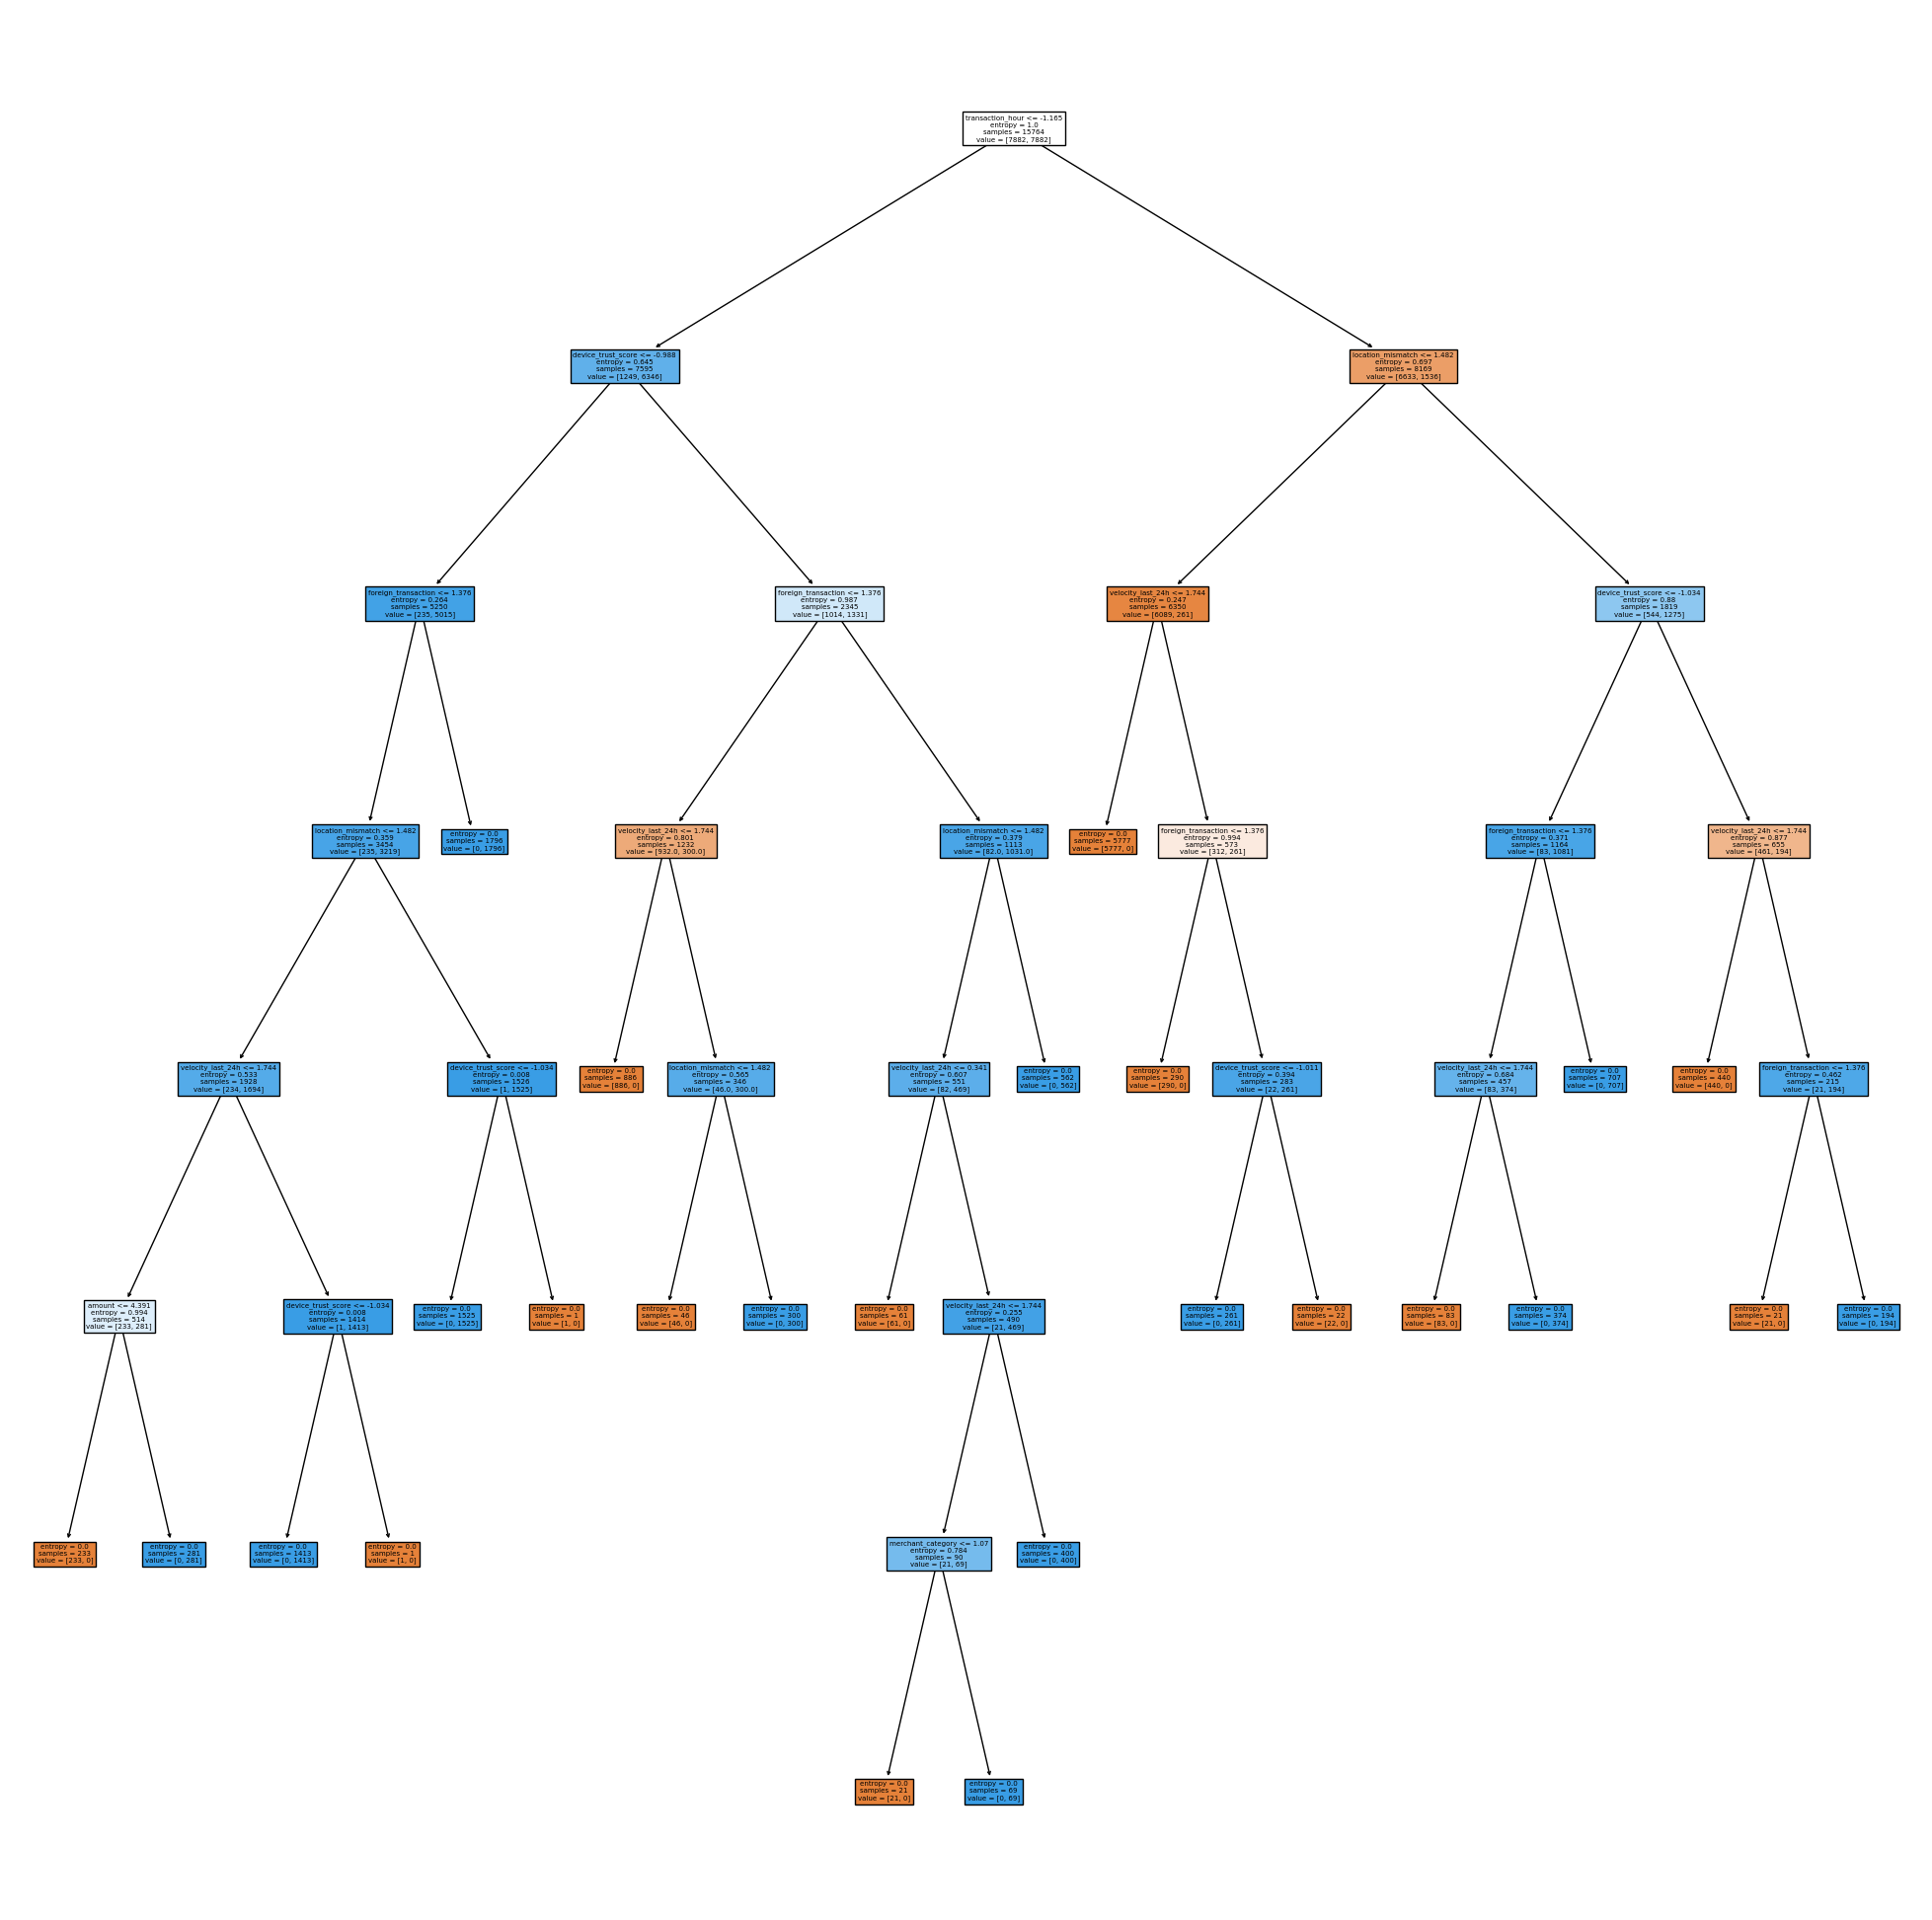

In [54]:
plt.figure(figsize=(25,25))
from sklearn import tree
features=x.columns
_=tree.plot_tree(dt1, feature_names= features,filled =True )
plt.show()

In [55]:
for i in range(1,8):
    dt3 = DecisionTreeClassifier(random_state =1, max_depth =i)
    dt3 = create_model(dt3)
    print("max depth :",i)
    

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      1967
           1       0.85      0.78      0.81      1967

    accuracy                           0.82      3934
   macro avg       0.82      0.82      0.82      3934
weighted avg       0.82      0.82      0.82      3934

Confusion matrix:
 [[1685  282]
 [ 427 1540]]
max depth : 1
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.78      0.84      1967
           1       0.81      0.91      0.86      1967

    accuracy                           0.85      3934
   macro avg       0.85      0.85      0.85      3934
weighted avg       0.85      0.85      0.85      3934

Confusion matrix:
 [[1544  423]
 [ 179 1788]]
max depth : 2
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.91      1967
           1       0.94      0.85      0.90  

In [56]:
dt3 = DecisionTreeClassifier(random_state =1, max_depth =4)
dt3 = create_model(dt3)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      1967
           1       0.94      0.90      0.92      1967

    accuracy                           0.92      3934
   macro avg       0.92      0.92      0.92      3934
weighted avg       0.92      0.92      0.92      3934

Confusion matrix:
 [[1849  118]
 [ 196 1771]]


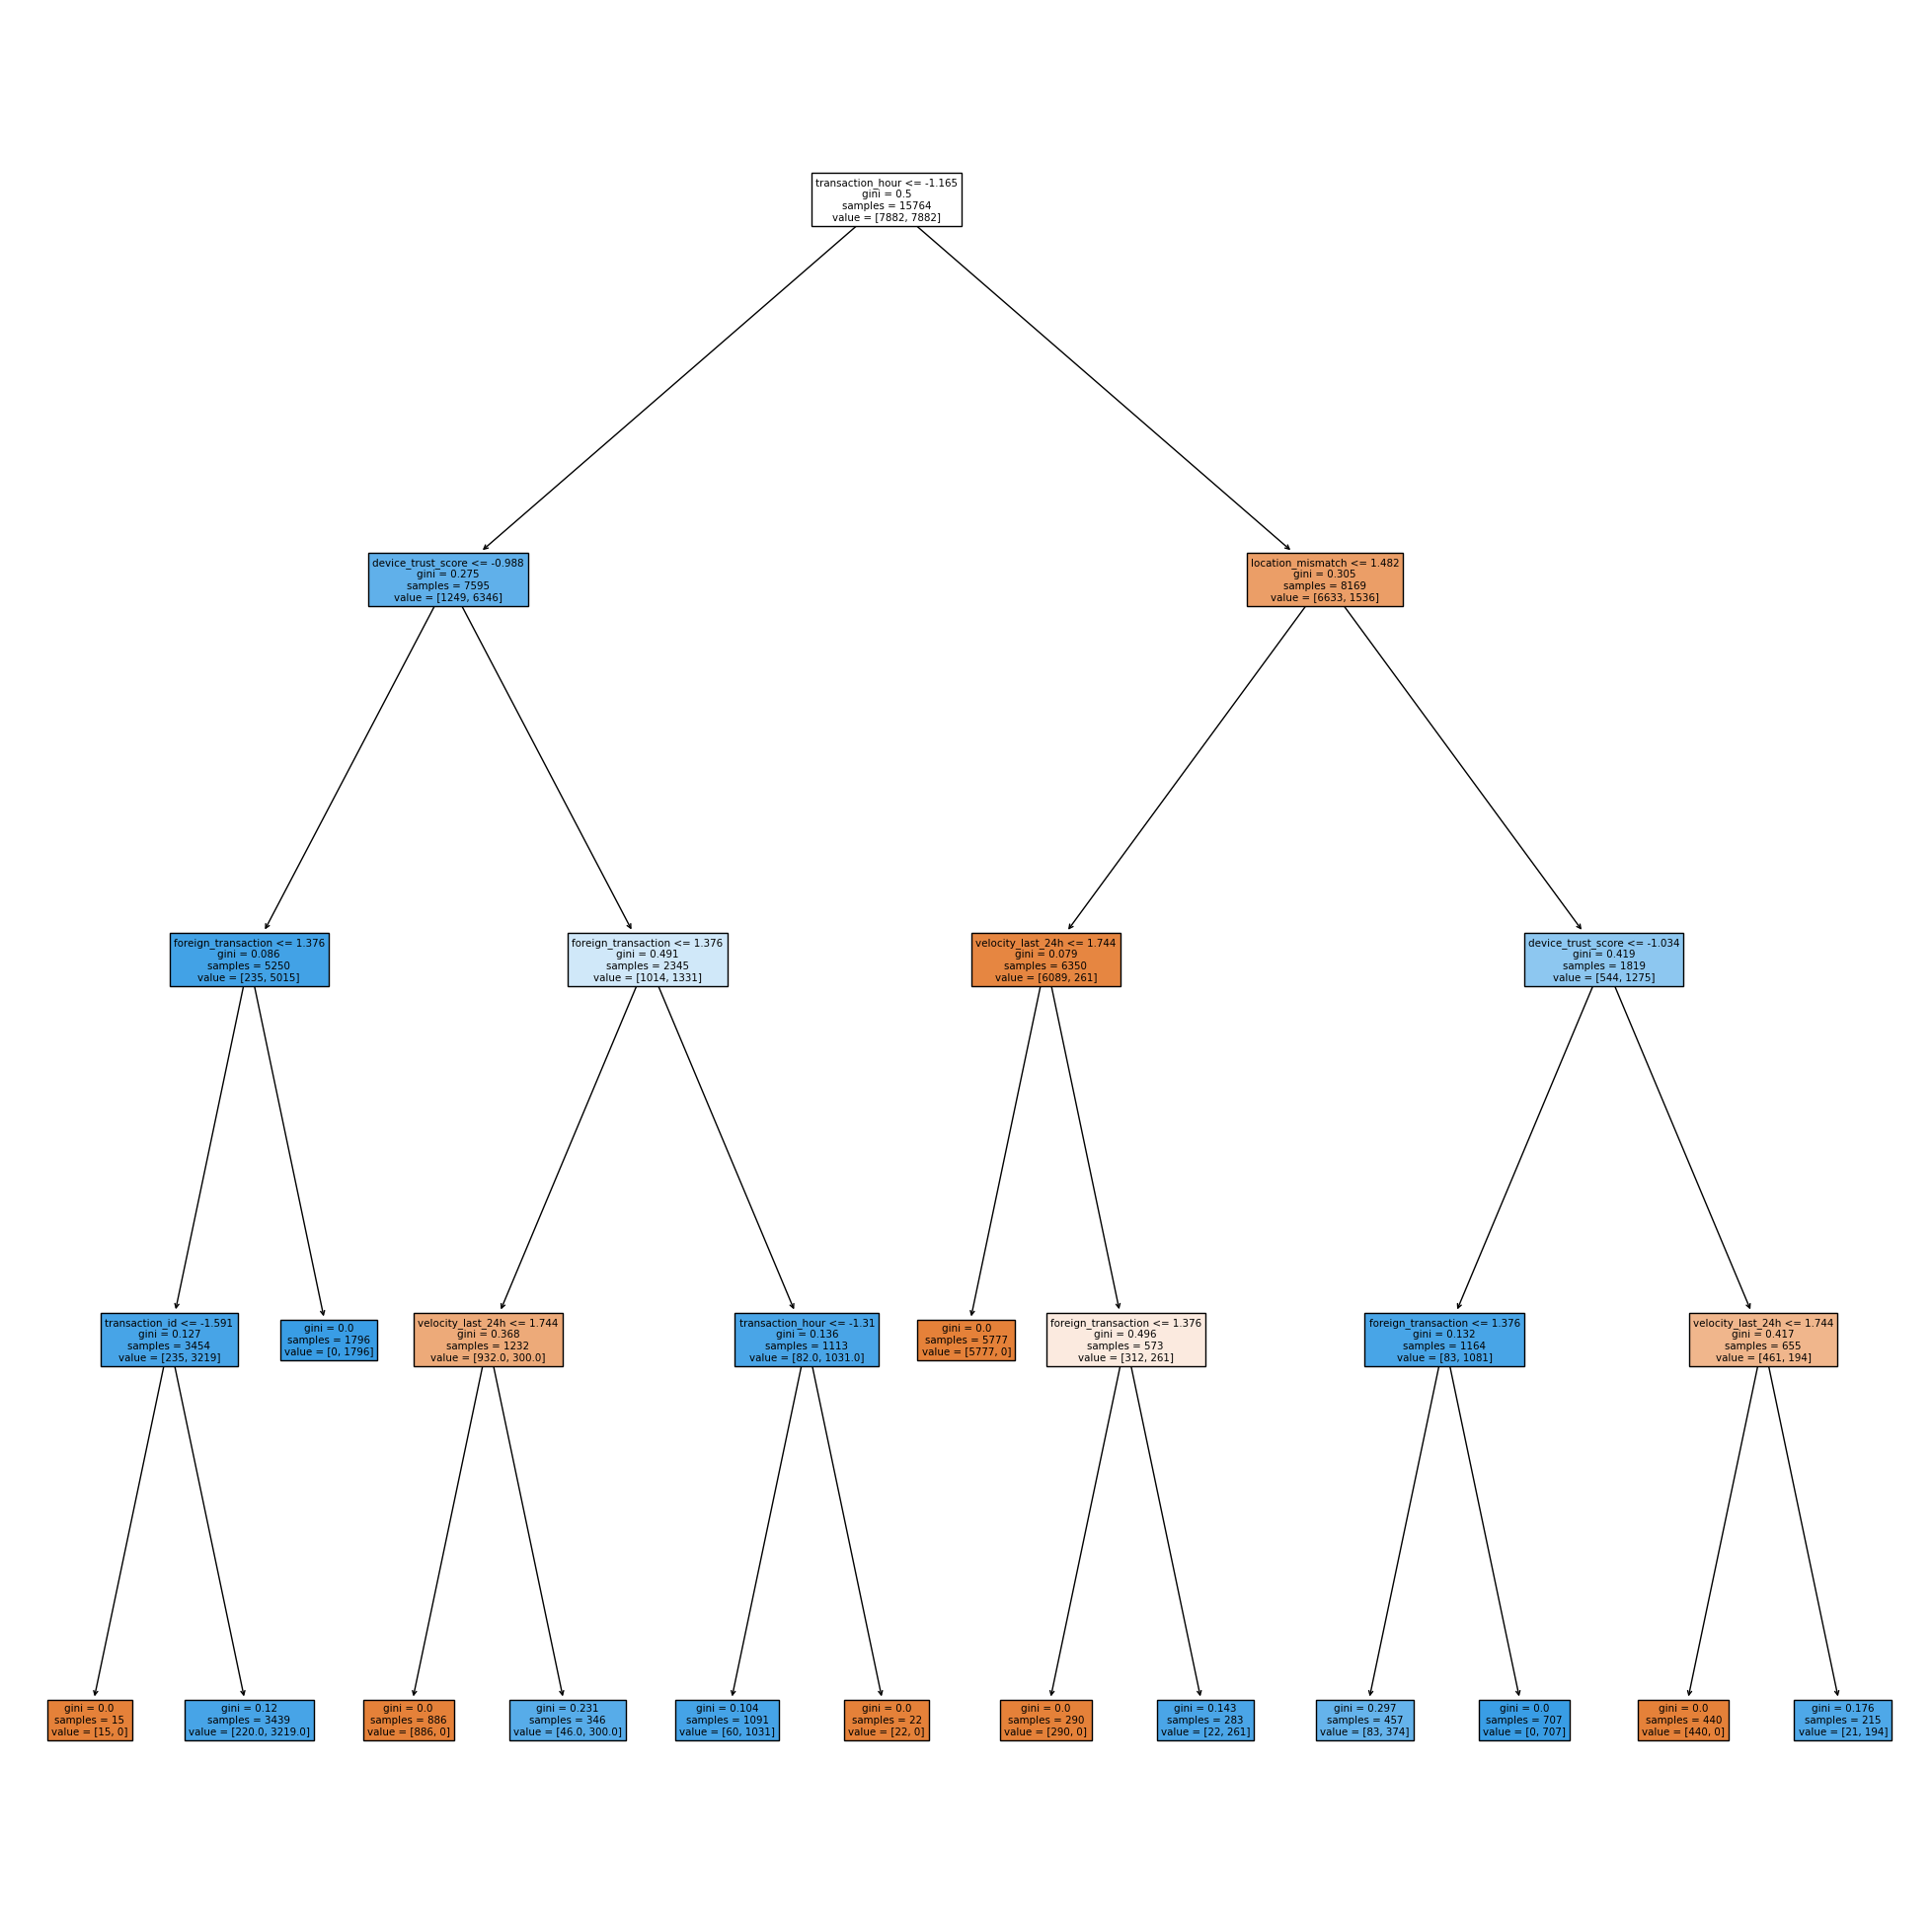

In [57]:
plt.figure(figsize=(25,25))
from sklearn import tree
features = x.columns
_=tree.plot_tree(dt3, feature_names= features, filled =True)
plt.show()

In [58]:
dt4 = DecisionTreeClassifier(random_state = 1 , min_samples_leaf= 45)
dt4 = create_model(dt4)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1967
           1       0.99      0.97      0.98      1967

    accuracy                           0.98      3934
   macro avg       0.98      0.98      0.98      3934
weighted avg       0.98      0.98      0.98      3934

Confusion matrix:
 [[1939   28]
 [  62 1905]]


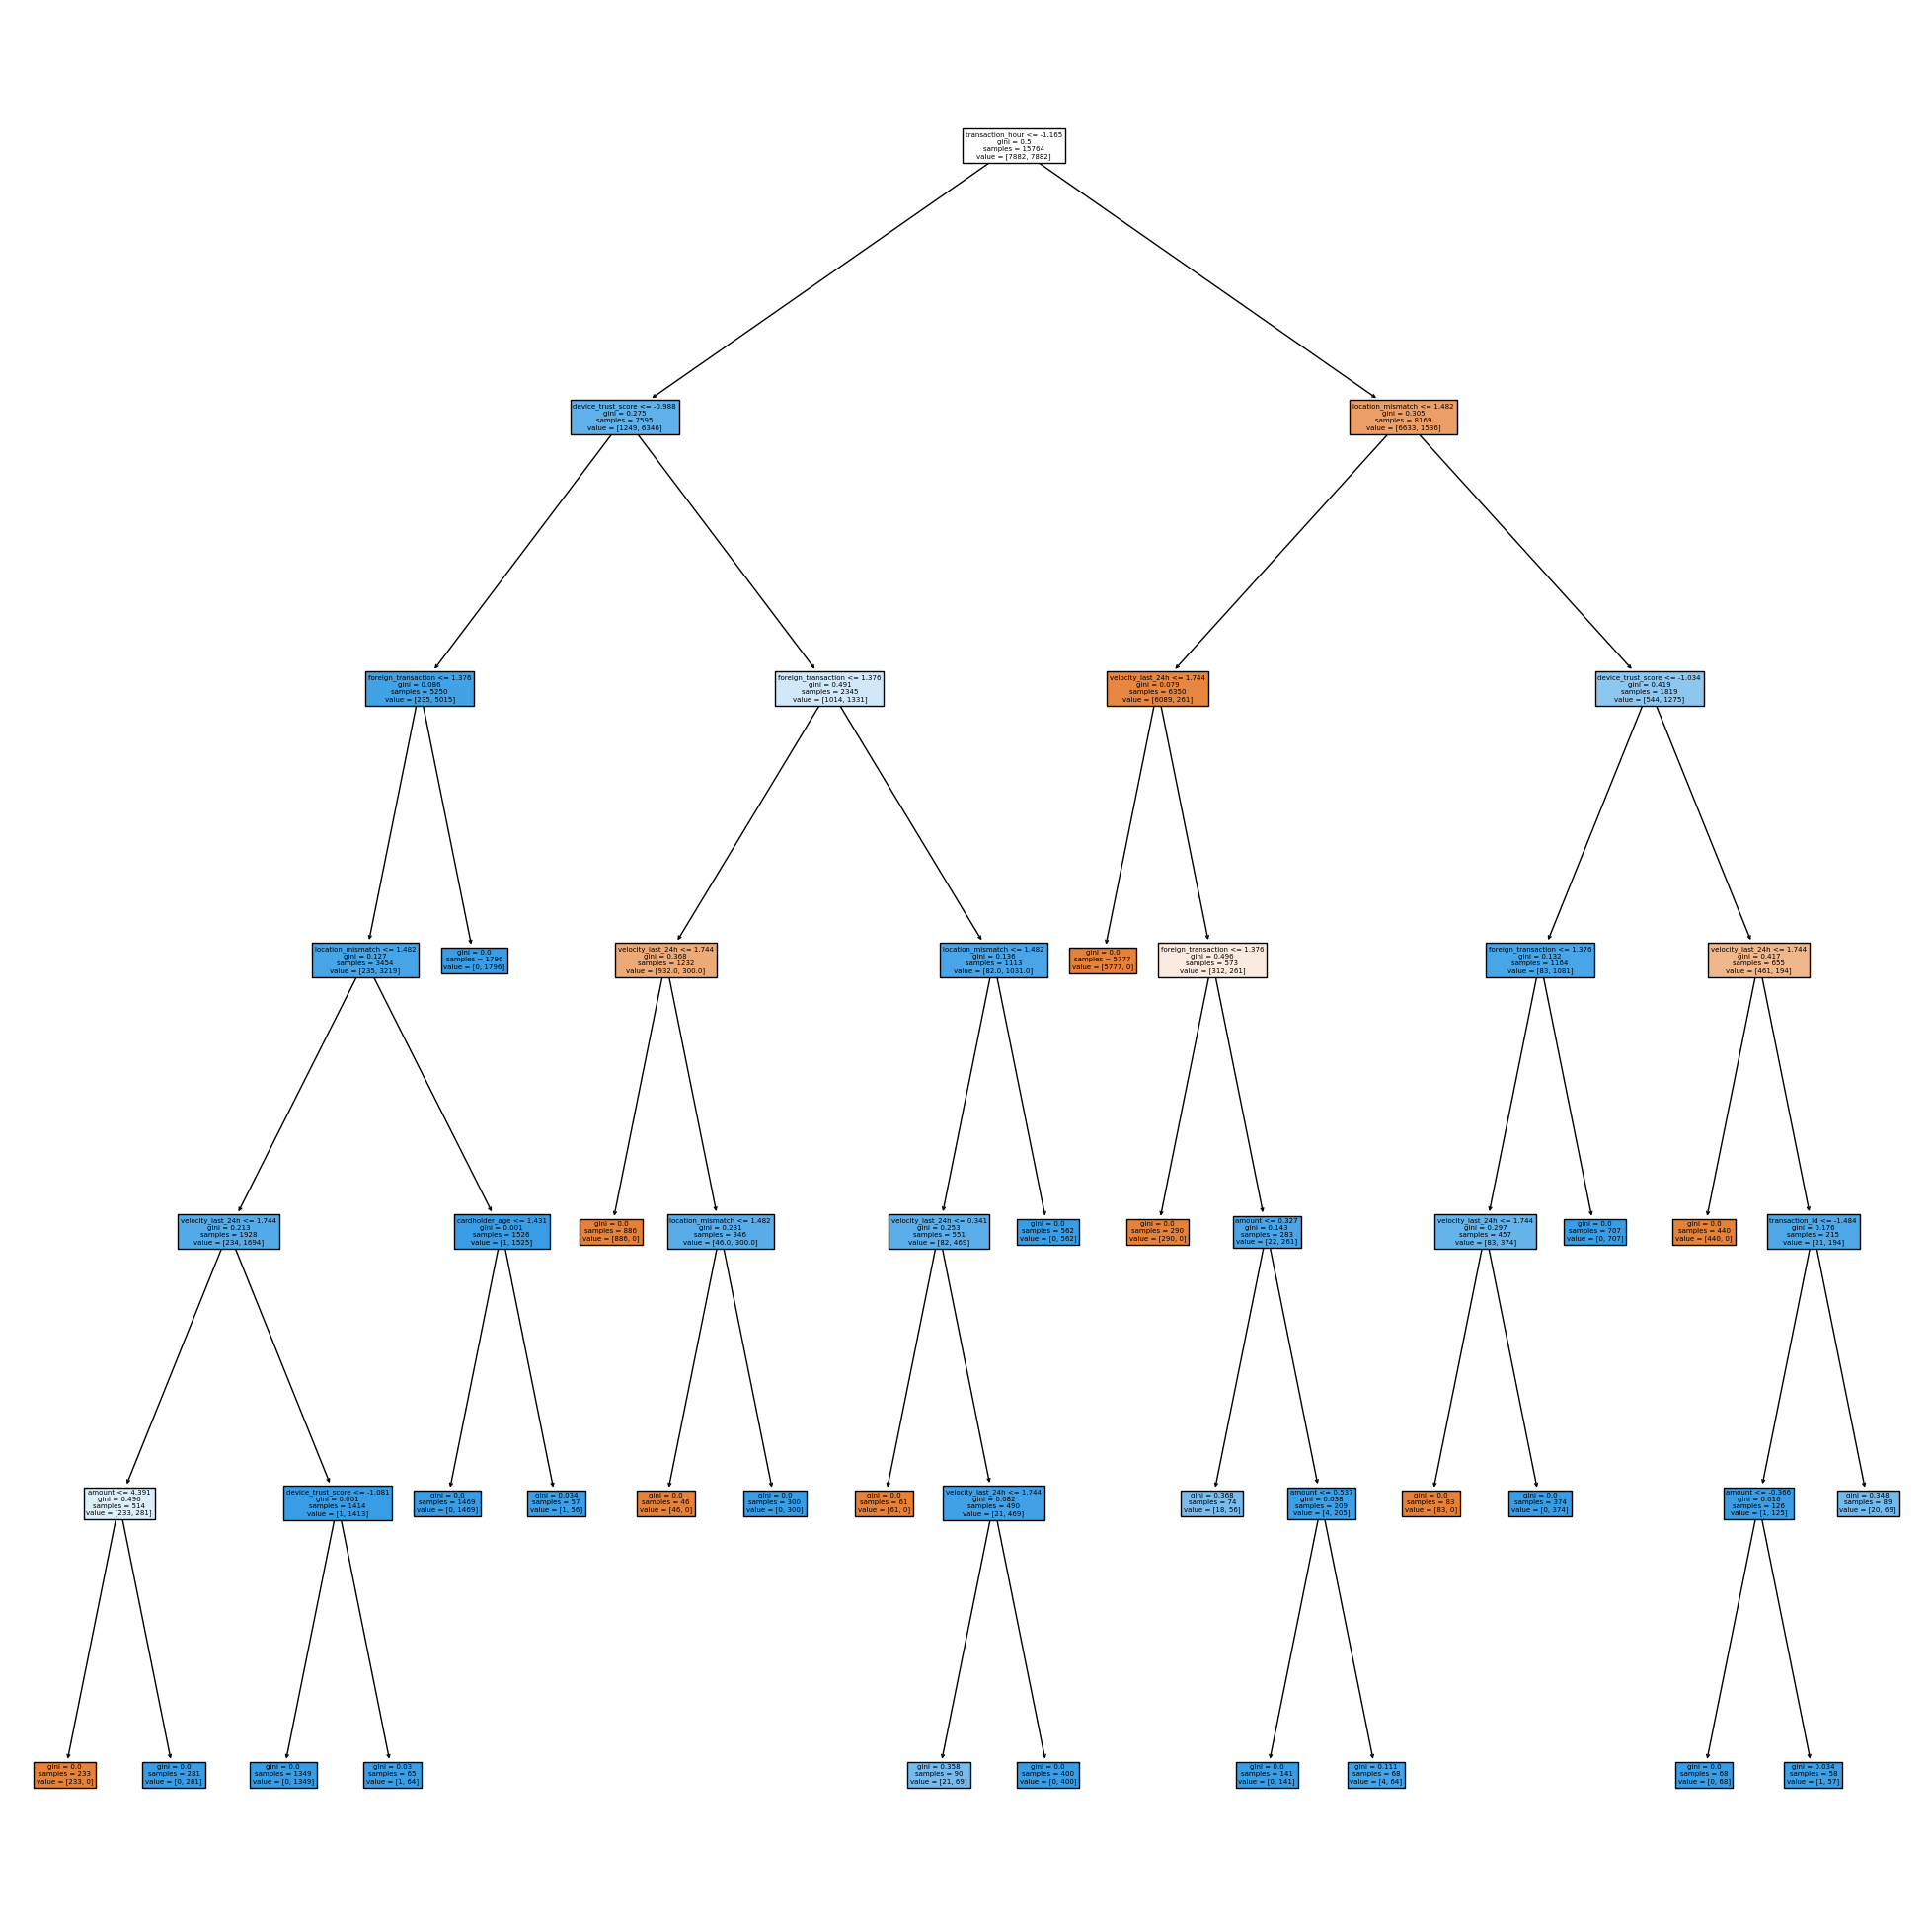

In [59]:
plt.figure(figsize=(25,25))
from sklearn import tree
features= x.columns
_= tree.plot_tree(dt4, feature_names=features, filled =True)
plt.show()

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
random = RandomForestClassifier(random_state =1 ,n_estimators=19)
random = create_model(random)

# # Here n_estimators means take how many no of decision tree
# # max_features means take how many i/p

Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88      1967
           1       1.00      0.72      0.84      1967

    accuracy                           0.86      3934
   macro avg       0.89      0.86      0.86      3934
weighted avg       0.89      0.86      0.86      3934

Confusion matrix:
 [[1967    0]
 [ 542 1425]]


In [62]:
dt4 = RandomForestClassifier(random_state = 1, n_estimators= 15, max_features =8)
dt4 = create_model(dt4)

Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1967
           1       1.00      0.94      0.97      1967

    accuracy                           0.97      3934
   macro avg       0.97      0.97      0.97      3934
weighted avg       0.97      0.97      0.97      3934

Confusion matrix:
 [[1967    0]
 [ 117 1850]]


In [63]:
from sklearn.ensemble import GradientBoostingClassifier

In [64]:
dt5 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=1)

In [65]:
dt5 = create_model(dt5)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98      1967
           1       1.00      0.97      0.98      1967

    accuracy                           0.98      3934
   macro avg       0.98      0.98      0.98      3934
weighted avg       0.98      0.98      0.98      3934

Confusion matrix:
 [[1967    0]
 [  62 1905]]
